In [3]:
from Libraries import *

In [4]:
train_dataset = pd.read_csv('housing/train.csv')
train_dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


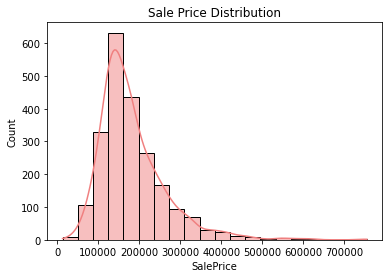

In [38]:
sns.histplot(data=train_dataset, 
             x=train_dataset['SalePrice'],
             bins=20, 
             kde = True,
             color='lightcoral'
            )
plt.title("Sale Price Distribution")
plt.show();

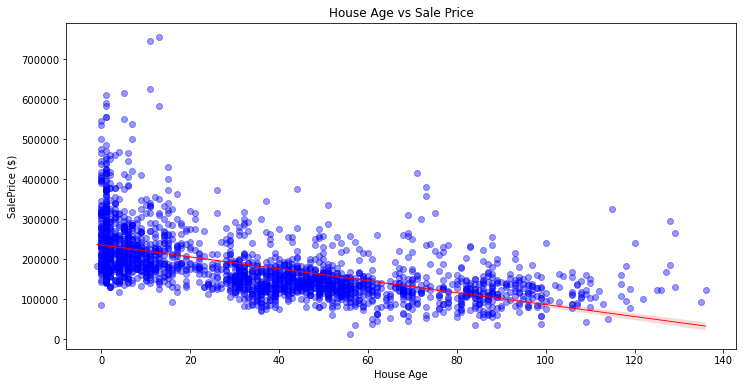

In [15]:
train_dataset['SalePrice'].mean()
plt.figure(figsize=(12,6))
g = sns.regplot(data=train_dataset, 
                x='House_Age', 
                y='SalePrice', 
                scatter_kws={'alpha': 0.4},
                color='blue',
                line_kws={'color': 'red','linewidth':0.9}
               )
plt.xlabel(xlabel='House Age')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='House Age vs Sale Price')
plt.show()

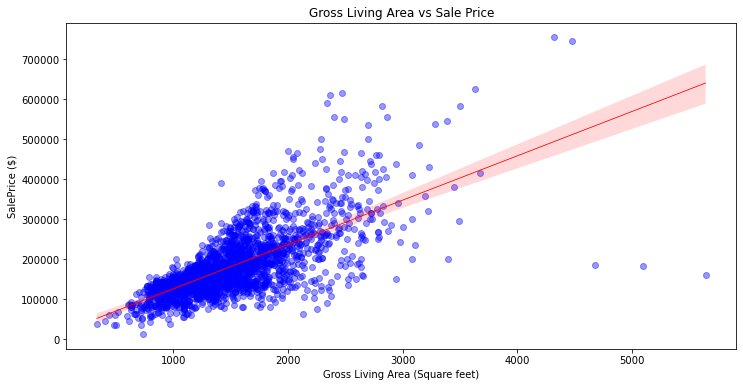

In [12]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=train_dataset, 
                x='Gr Liv Area', 
                y='SalePrice', 
                scatter_kws={'alpha': 0.4},
                color='blue',
                line_kws={'color': 'red','linewidth':0.8}
               )
plt.xlabel(xlabel='Gross Living Area (Square feet)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Gross Living Area vs Sale Price')
plt.show()

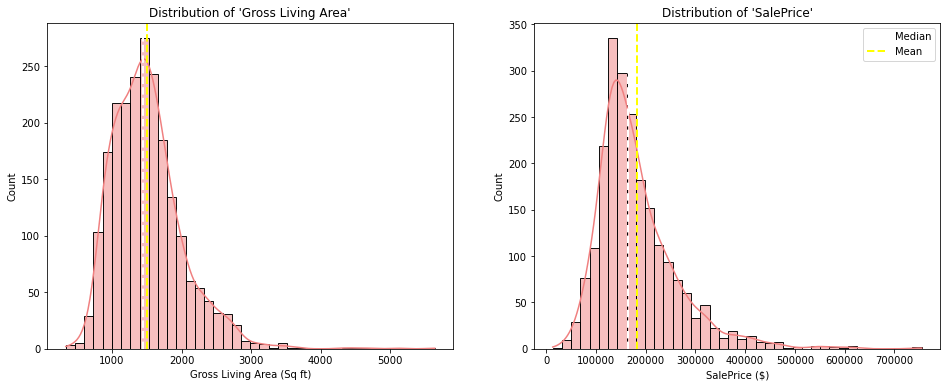

In [31]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
sns.histplot(data=train_dataset, x='Gr Liv Area',bins=40, kde=True, ax=ax[0], color = 'lightcoral')
ax[0].axvline(train_dataset.loc[:,'Gr Liv Area'].median(), color='white', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(train_dataset.loc[:,'Gr Liv Area'].mean(), color='yellow', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of \'Gross Living Area\'', fontsize=12)
ax[0].set_xlabel('Gross Living Area (Sq ft)')

sns.histplot(data=train_dataset, x='SalePrice',bins=40, kde=True, ax=ax[1],color = 'lightcoral')
ax[1].axvline(train_dataset.loc[:,'SalePrice'].median(), color='white', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(train_dataset.loc[:,'SalePrice'].mean(), color='yellow', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')
plt.legend()
plt.show()

GrnHill      1
Landmrk      1
Blueste      4
Greens       6
Veenker     15
NPkVill     19
BrDale      21
Blmngtn     24
MeadowV     26
ClearCr     30
SWISU       32
StoneBr     36
NoRidge     52
Timber      52
IDOTRR      70
BrkSide     72
Crawfor     76
Mitchel     89
SawyerW     89
Sawyer      99
NWAmes     105
Gilbert    127
NridgHt    135
Edwards    149
Somerst    149
OldTown    182
CollgCr    212
NAmes      324
Name: Neighborhood, dtype: int64


Text(0.5, 1.0, 'Number of houses per Neighborhood')

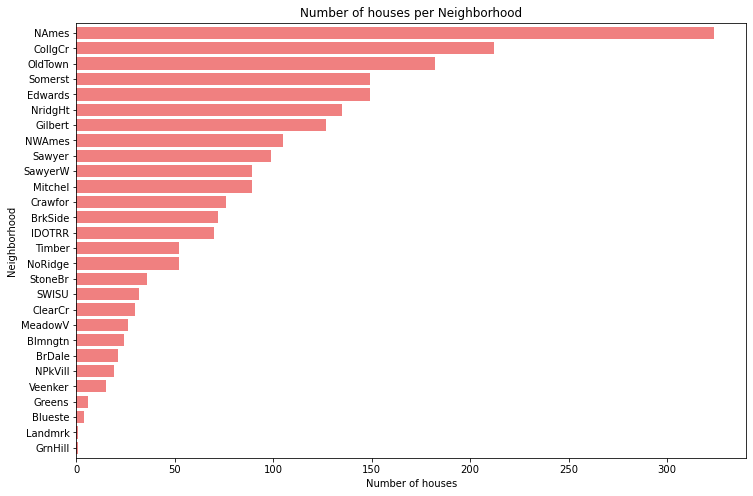

In [47]:
print(train_dataset['Neighborhood'].value_counts(ascending=True))
plt.figure(figsize=(12,8))
train_dataset['Neighborhood'].value_counts(ascending=True).plot(kind='barh', color='lightcoral', width=0.8)

plt.xlabel("Number of houses")
plt.ylabel("Neighborhood")
plt.title("Number of houses per Neighborhood")

Text(0.5, 1.0, 'Mean Sale Price by Neighborhood')

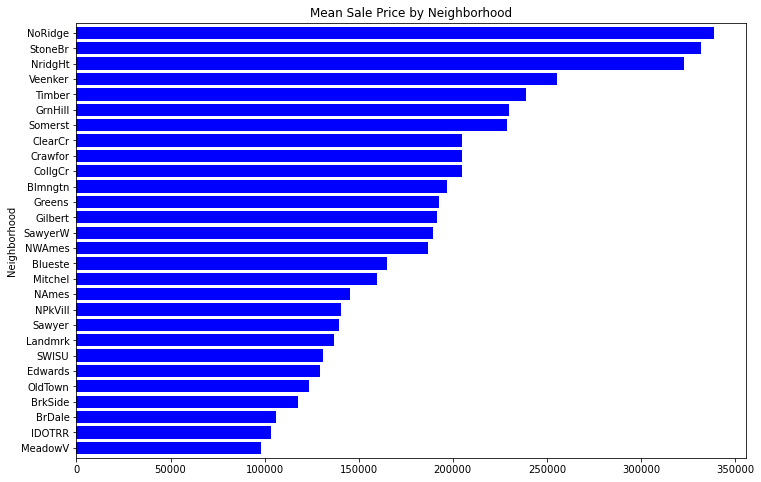

In [49]:
plt.figure(figsize=(12,8))
train_dataset.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = True).plot(kind='barh', color='blue', width=0.8);

plt.title("Mean Sale Price by Neighborhood")

Text(0.5, 1.0, 'No. of Transaction vs Month')

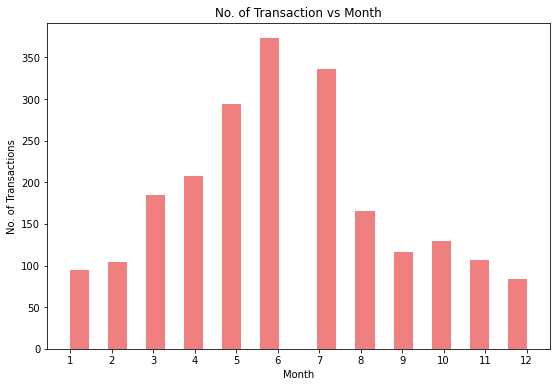

In [51]:
plt.figure(figsize=(9,6))

plt.hist(train_dataset['Mo Sold'], bins=24, color='lightcoral')
plt.xticks(range(1,13,1))
plt.xlabel("Month")
plt.ylabel("No. of Transactions")
plt.title("No. of Transaction vs Month")

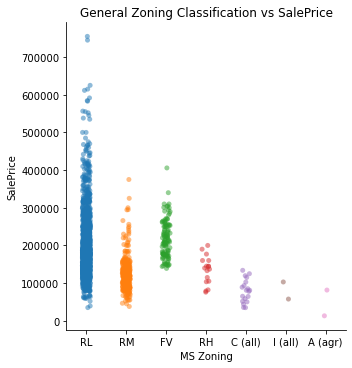

In [14]:
sns.catplot(x='MS Zoning', y='SalePrice', data=train_dataset, alpha=0.5)
plt.title('General Zoning Classification vs SalePrice')
plt.show();

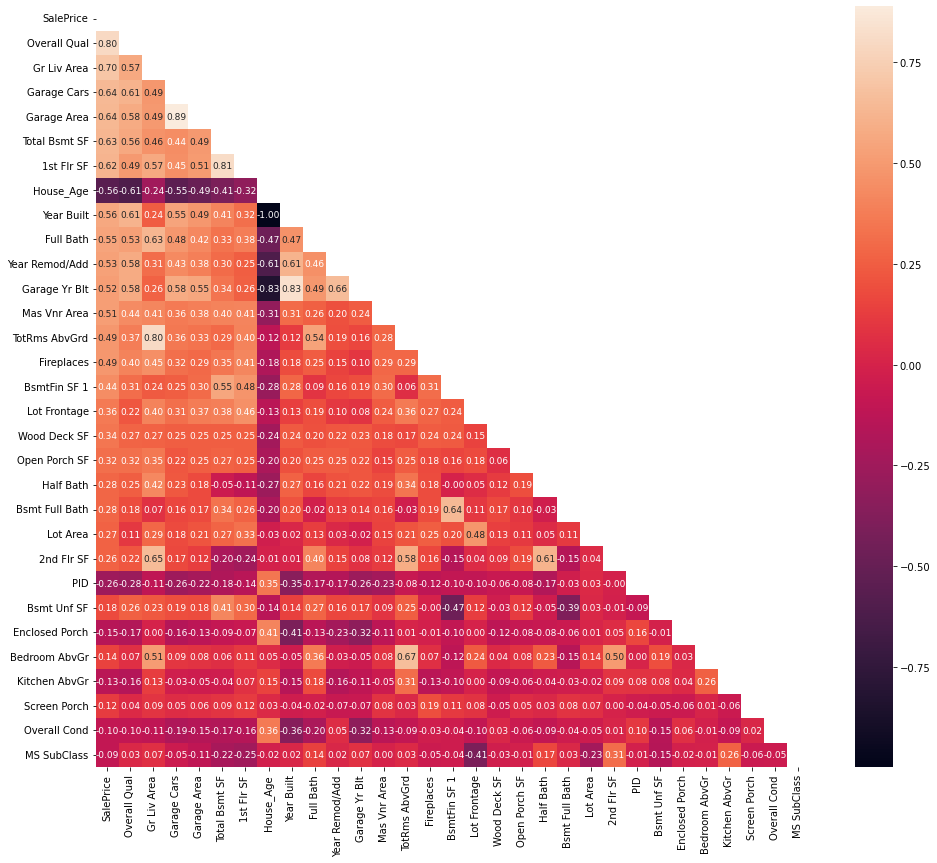

In [54]:
correlations_with_ref_to_saleprice = train_dataset.corr().loc[:,'SalePrice']
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)

top_correlations = train_dataset.loc[:,list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()